- 만약 해당 변수를 바로 table 만들면 범주가 너무 많아서 원하는 결과를 얻을 수 없음
- 따라서 묶어서 자르자
  - 그 개념이 table 안에서 cut을 설정해주는 것.

In [7]:
table(cut(ds$co, breaks=5))


(0.359,8.58]  (8.58,16.8]  (16.8,24.9]  (24.9,33.1]  (33.1,41.3] 
         347          237           88           23            5 

```r
ds = read.csv("buy.csv", header=T)

### 가장 기본적인 함수
plot(ds\$income, ds\$exp) 

### 자주 쓰는 함수
hist(ds\$income)
barplot(ds\$buy)
#원하는 형태 아님
#그냥 hist로 그리는 게 나을 것 같음
#아니면 table 생성하고 그리자!

pie(ds\$co)		#연속형 변수

barplot(table(ds\$buy))
hist(ds\$buy)
pie(table(cut(ds\$co, breaks=5)))




ds\$year = as.factor(ds\$year) # 범주형 변수로 생성한다.
ds\$age = as.factor(ds\$age)
# 모자이크 플랏
# 도형을 교차표의 행 빈도에 비례하는 직사각 도형으로 나누어 줍니다
mosaicplot(table(ds\$year, ds\$age), color=TRUE, cex=1.2)
# table 이용하려면 factor 변수로 변경해주어야 하나 봄




# 산점도로 이루어진 행렬 그리기
ds\$year = as.factor(ds\$year)
pairs(ds[6:10], main = "Income Data (3 years)", 
   pch = 21, bg = c("red", "green3", 
   "blue")[ds\$year])
# bg나 col이나 색 관련 인자
pairs(ds[6:10], main = "Income Data (3 years)", 
   pch = 21, col = c("red", "green3", 
   "blue")[ds\$year])

### 2개의 범주형 변수를 이용한 막대그래프
### 예: 교육수준별 연령대의 분포
ds\$age = as.factor(ds\$age)
ds\$edu = as.factor(ds\$edu)
bartable = table(ds\$age, ds\$edu)  # get cross tab
# python에서는 pd.crosstab으로 가능

barplot(bartable, legend = levels(unique(ds\$age)))
# legend는 범례표현

barplot(bartable, beside = TRUE, 
   legend = levels(unique(ds$age)))
# beside -> TRUE를 지정하면 각각의 값마다 막대를 그림 


```

In [19]:
unique(ds$age)
# 아래 levels 눌러보기

[1] 5 4 3 2
Levels: 2 3 4 5

In [13]:
levels(unique(ds$age))

[1] "2" "3" "4" "5"

```python
import matplotlib.pyplot as plt
ds = pd.read_csv('buy.csv', header=0, sep=",")

# 가장 기본적인 함수
plt.scatter(ds.income, ds.exp)

# 자주 쓰는 함수
plt.hist(ds.income)

x = np.arange(len(ds.income))
plt.bar(x, ds.buy) #원하는 형태 아님
# buy는 이진 분류라 barplot으로 사용하긴 좀 그럼
plt.pie(ds.co)	  #연속형 변수

x = ds['buy'].value_counts()
plt.bar(x.index, x.values)
# 이진분류를 barplot으로 사용하려면
# 이렇게 r에서의 table처럼 사용해야함


# r에서의 table
x = pd.crosstab(index=ds['buy'],columns='count')
plt.bar(x.index, x['count'])



# pd.cut(ds.co,bins=5) : Series로 반환됨
x=pd.crosstab(index=pd.cut(ds.co,bins=5),columns='count')
labels = ['A', 'B', 'C', 'D', 'E']
plt.pie(x['count'], labels=labels, 
   autopct='%.1f%%')
# autopct : 부채꼴 안에 표시될 숫자의 형식
# 소수점 아래 한자리까지 표현

from statsmodels.graphics.mosaicplot import mosaic
ds['year'].astype('category')
ds['age'].astype('category')
mosaic(ds, ['year', 'age'], gap=0.01)
# gap은 그냥 ..각 범주간의 간격임
# 한 box안에서 연속되게 표현하려면 gap이 적은 게 좋음

# 산점도로 이루어진 행렬
import seaborn as sns
sns.pairplot(ds.iloc[:, 5:9], diag_kind='hist')
# diag_kind='hist' : 대각행렬은 hist로 표현

ds['year'].astype('category')
sns.pairplot(ds, diag_kind='hist', hue='year', vars=['income', 'exp', 'co', 'ad', 'prod'])   

# 2개의 범주형 변수를 이용한 막대그래프
# 예: 교육수준별 연령대의 분포
bartable = pd.crosstab(ds.edu, ds.age)  ## get the cross tab
bartable.plot.bar(stacked=True, rot=5)
bartable.plot.bar(stacked=False, rot=0) 
# stacked -> 쌓아서 표현
# rot -> x축 라벨 기울이는 정도




```

---

---

---

---

```r
plot(ds\$income, ds\$exp, main="Scatter plot", xlab="Income", ylab="Expense", xlim=c(0, 40000), ylim=c(0, 30000), type="p", pch=20, cex=2, col="red") 

# pch = 점의 형태
# cex = 점의 크기

```

```python
plt.scatter(ds.income, ds.exp, alpha=0.2, 
            marker = '.', # marker
            s=200*ds.edu, # marker size
            # 사이즈로 edu도 표현
            c=ds.age) # marker color

# income, exp, edu, age 4차원 그래프
plt.title("Scatter plot")
plt.xlabel("Income")
plt.ylabel("Expense")
plt.xlim(0, 40000)
plt.ylim(0, 30000)


```

---

---

---

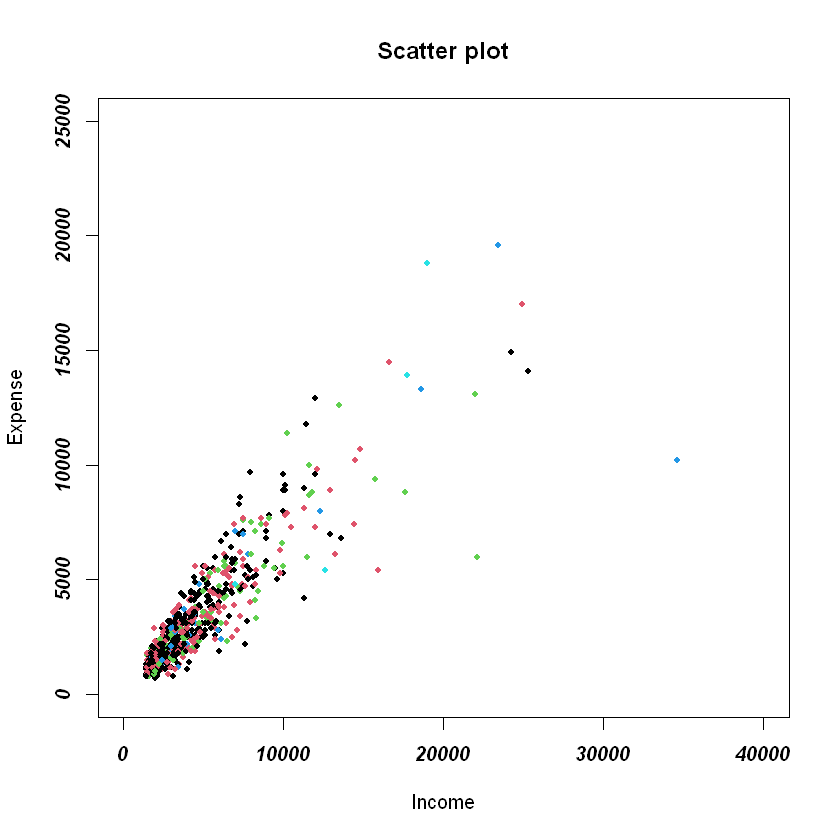

In [37]:
plot(ds$income, ds$exp, main="Scatter plot", xlab="Income", ylab="Expense", xlim=c(0, 40000), ylim=c(0, 25000), type="p", pch=20, cex=1, col=ds$edu, font=4)

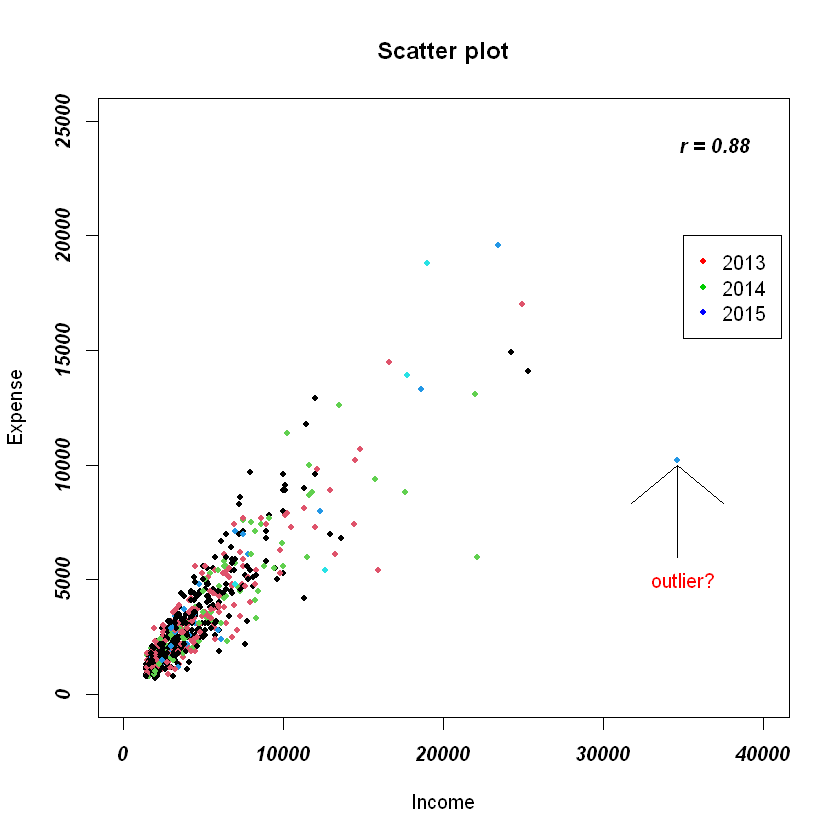

In [42]:
plot(ds$income, ds$exp, main="Scatter plot", xlab="Income", ylab="Expense", xlim=c(0, 40000), ylim=c(0, 25000), type="p", pch=20, cex=1, col=ds$edu, font=4)

text(37000, 24000, "r = 0.88", font=4)

arrows(34600, 6000, 34600, 10000, length=0.5, angle=50)
text(35000, 5000, "outlier?", col="red")

legend(35000, 20000, legend=c("2013", "2014", "2015"), col=c("red", "green3", "blue"), pch=20)

```r
### 그래픽 파라미터(parameter) 지정 : par()

### 다중 플롯 : mfrow (multiple figures by row), mfcol 
par(mfrow=c(2, 2)) # 총 4개의 그래프를 그릴 수 있음
plot(ds\$income, ds\$exp) 
plot(ds\$income, ds\$co) 
plot(ds\$income, ds\$ad) 
plot(ds\$income, ds\$prod) 

### par()함수를 이용한 옵션 조정
par(mfrow=c(1, 1))
par(mfrow=c(2, 1), pch=20, cex=2)
# 이건 너무 커서 안 그려짐
# pch =10, cex = .5 정도가 적당
plot(ds\$income, ds\$exp) 
plot(ds\$income, ds\$co)

### 그래프에 text 및 화살표 추가
plot(ds$income, ds$exp, main="Scatter plot", xlab="Income", ylab="Expense", xlim=c(0, 40000), ylim=c(0, 25000), type="p", pch=20, cex=1, col=ds$edu, font=4)

text(37000, 24000, "r = 0.88", font=4)

arrows(34600, 6000, 34600, 10000, length=0.1, angle=20)
text(35000, 5000, "outlier?", col="red")


### 그래프에 대한 범례(legend) 작성
legend(35000, 20000, legend=c("2013", "2014", "2015"), col=c("red", "green3", "blue"), pch=20)

```

---

---

---

---

```python
# 잠시 다른 얘기
np.arange(0,4)
np.arange(4)
np.linspace(0,3,4)
모두 동일한 결과를 반환한다

### 다중 플롯
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)


# 총 4개의 그림을 그릴 건데 좌상단부터 우상단
# 좌하단 우하단 순으로 1,2,3,4 번호 매겨서 그릴 수 있음
plt.subplot(2,2,1) 
plt.plot(x, y)
plt.subplot(2,2,2)
plt.plot(x, y**2)
plt.subplot(2,2,3)
plt.plot(x, -y)
plt.subplot(2,2,4)
plt.plot(x, -y**2)

### 그래프에 text 및 화살표 추가

groups = ds.groupby("year")

for name, group in groups:
    plt.plot(group["income"], group["exp"], 
           marker="o", linestyle="", label=name)

plt.legend()

plt.annotate('outlier?', xy=(34600, 10000), 
   xytext=(32600, 5000), 
   arrowprops={'color':'red'})
```

---

---

---

---

```r
### Graph 1: Basic graph function
hist(ds$income, breaks=30, col="red")
# breaks -> 범위 지정
# 즉 30개의 범위로 나누겠다
# 이 범위가 많아질수록 histogram의 형태는 더욱 세밀해질 것

text(x=34000, y=50, col = "blue", label = "Outliers")
arrows(34300, 45, 34300, 10, length=0.5) # 시점 , 종점
text(x=10000, y=150, col = "blue", label = "Most of the distribution is 
	concentrated at")
text(x=12000, y=137, col = "blue", label = "the interval () ...")


### Graph 2: ggplot2 package
### Graph 2: ggplot2 package
library(ggplot2)

ggplot(ds) +
geom_histogram(aes(x=income),binwidth=1500, fill="red") +
annotate("text", x=34000, y=50, col = "blue", label = "Outliers") +
geom_segment(aes(x=34300, y=45, xend=34300, yend=10), colour='blue', size=1, arrow =arrow(length = unit(0.1, "cm"))) + 
annotate("text", x = 10000, y=150,colour = "blue", label = "Most of the distribution is concentrated at") + 
annotate("text", x = 12000, y=140, colour = "blue", label = "the interval () ...")

# binwidth는 구간 범위임
# 즉 해당 값이 커질 수록 막대개수는 줄어들 것이고
# 해당 값이 작아질 수록 막대개수는 늘어날 것.```
```

```python
import pandas as pd
ds = pd.read_csv('buy.csv', header=0, sep=",")

import matplotlib.pyplot as plt
from plotnine import *

fig = plt.Figure()
(ggplot(ds) + 
     aes(x="income") +
     geom_histogram(bins=10, fill="red") +
     annotate("text", x=32000, y=100, color = 
                 "blue", label = "Outliers") +
     geom_segment(aes(x=32300, y=85, 
            xend=32300, yend=10), color='blue', 
            size=1, arrow = arrow()) +
     annotate("text", x = 20000, y=350, colour = 
            "blue", label = "Most of the 
               distribution is concentrated at") + 
      annotate("text", x = 22000, y=320, colour 
           = "blue", label = "the interval () ...")
)
 
 
혹은 아래와 같이 사용할 수 있다
주의할 점은 R에서는 그냥 다음줄로 넘길 때 enter로 가능하지만
파이썬에서는 그럼 인식을 못한다.
-> 아예 전체를 괄호로 묶어서 처리하던지, 아니면 역슬래시를 이용해야한다
  -> 추가 주의 : 역슬래시 다음엔 공백이 있으면 안 되고 바로 내려야 함

 
import pandas as pd
ds = pd.read_csv('buy.csv', header=0, sep=",")

import matplotlib.pyplot as plt
from plotnine import *

fig = plt.Figure()
ggplot(ds) + geom_histogram(aes(x="income"),bins=10, fill="red") +\
annotate("text", x=32000, y=100, color = "blue", label = "Outliers") +\
geom_segment(aes(x=32300, y=85, xend=32300, yend=10), color='blue', size=1, arrow = arrow()) +\
annotate("text", x = 20000, y=350, colour = "blue", label = "Most of the distribution is concentrated at") +\
annotate("text", x = 22000, y=320, colour = "blue", label = "the interval () ...")
```